In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
dataset = pd.read_csv('recipes_muffins_cupcakes.csv')

In [34]:
dataset.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


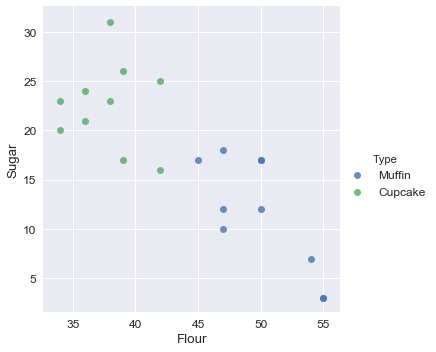

In [39]:
# lmplot - linear model plot
sns.lmplot('Flour', 'Sugar', data=dataset, fit_reg=False, hue='Type')

In [41]:
features = dataset.iloc[:,[1,3]].values
target = np.where(dataset['Type']=='Muffin', 0, 1)

In [42]:
model = svm.SVC(kernel='linear')
model.fit(features, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
w = model.coef_[0]

In [44]:
w

array([ -6.66503014e-01,  -7.77156117e-16])

In [77]:
model.intercept_

array([ 28.99296292])

In [78]:
model.support_vectors_

array([[ 45.,  17.],
       [ 42.,  16.],
       [ 42.,  25.]])

In [85]:
a = -w[0] / w[1]
a

-857617921181270.0

In [96]:
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [97]:
print(xx)
print(yy)

[ 30.          30.6122449   31.2244898   31.83673469  32.44897959
  33.06122449  33.67346939  34.28571429  34.89795918  35.51020408
  36.12244898  36.73469388  37.34693878  37.95918367  38.57142857
  39.18367347  39.79591837  40.40816327  41.02040816  41.63265306
  42.24489796  42.85714286  43.46938776  44.08163265  44.69387755
  45.30612245  45.91836735  46.53061224  47.14285714  47.75510204
  48.36734694  48.97959184  49.59183673  50.20408163  50.81632653
  51.42857143  52.04081633  52.65306122  53.26530612  53.87755102
  54.48979592  55.10204082  55.71428571  56.32653061  56.93877551
  57.55102041  58.16326531  58.7755102   59.3877551   60.        ]
[  1.15779472e+16   1.10528750e+16   1.05278028e+16   1.00027306e+16
   9.47765844e+15   8.95258624e+15   8.42751405e+15   7.90244185e+15
   7.37736965e+15   6.85229746e+15   6.32722526e+15   5.80215306e+15
   5.27708087e+15   4.75200867e+15   4.22693647e+15   3.70186428e+15
   3.17679208e+15   2.65171988e+15   2.12664769e+15   1.6015754

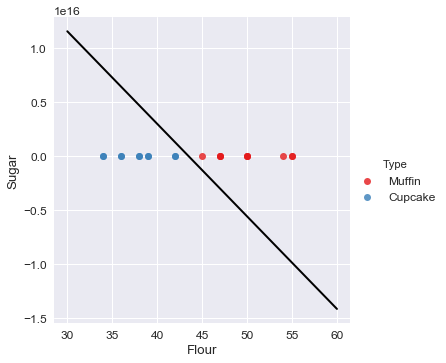

In [98]:
sns.lmplot('Flour', 'Sugar', data=dataset, hue='Type', palette='Set1', fit_reg=False)
plt.plot(xx, yy, linewidth=2, color='black')

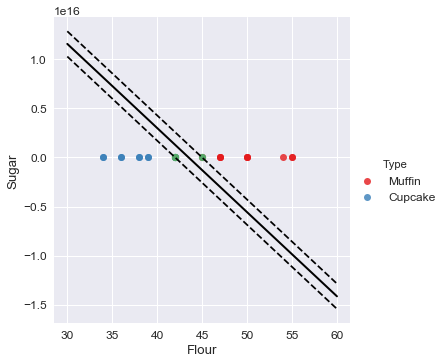

In [60]:
sns.lmplot('Flour', 'Sugar', data=dataset, hue='Type', palette='Set1', fit_reg=False)
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1])

In [54]:
def prediction(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('muffin')
    else:
        print('cupcake')

In [55]:
muffin_or_cupcake(50, 20)

muffin


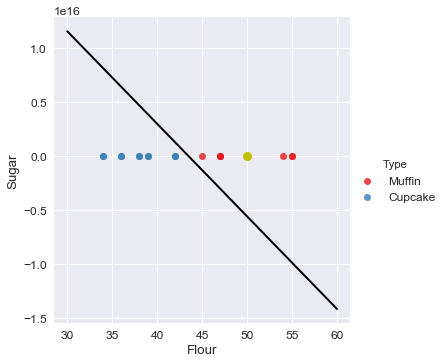

In [57]:
sns.lmplot('Flour', 'Sugar', data=dataset, hue='Type', palette='Set1', fit_reg=False)
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9')

In [58]:
muffin_or_cupcake(40,20)

cupcake
